###### Credit : superdatascience.com & Jose Portilla, Pierian Data www.pieriantraining.com

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data

In [129]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [130]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [131]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [132]:
df_feat = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

In [133]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [134]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

## EDA

##### Count of Data Cases

In [135]:
target_df = pd.DataFrame(cancer['target'])
target_df.columns = ['benign_0__mal_1']

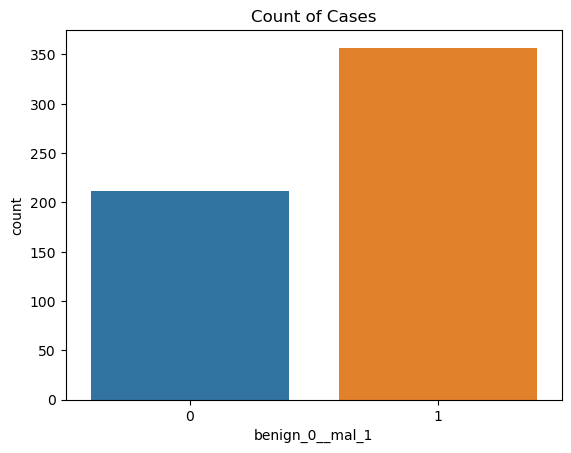

In [136]:
sns.countplot(target_df, x = 'benign_0__mal_1')

plt.title('Count of Cases')
plt.show()

##### Correlations

In [137]:
corr_df = pd.concat([df_feat, target_df], axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

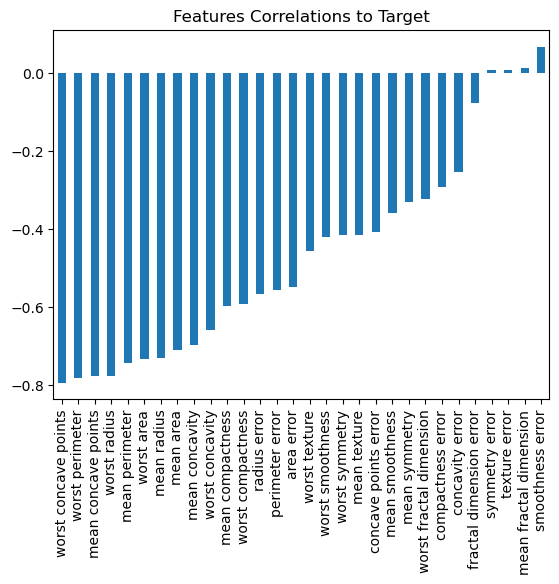

In [140]:
corr_df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

plt.title('Features Correlations to Target')
plt.show

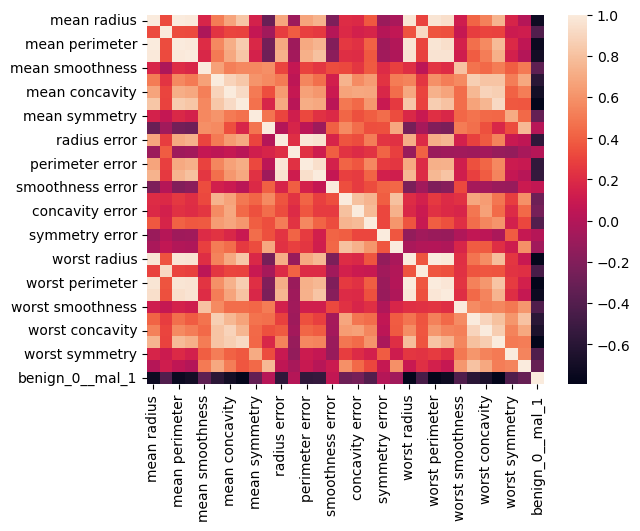

In [141]:
sns.heatmap(corr_df.corr())

plt.show()

## Preprocessing

##### Set Split

In [142]:
X = df_feat
y = cancer['target']

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

##### Feature Scaling

In [144]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##### Encode y_train label

In [145]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

## 1/ XGBoost

##### Model

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

##### Prediction

In [37]:
xgb_pred = xgb.predict(X_test)
xgb_pred = le.inverse_transform(xgb_pred)

##### Evaluation

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, xgb_pred)
print(cm)
accuracy_score(y_test, xgb_pred)

[[ 64   2]
 [  3 102]]


0.9707602339181286

##### k-Fold Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)

print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 95.99 %
Standard Deviation : 3.00 %


## 2-1/ ANN (Overfitting Example)

##### Feature Scaling

In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_ann_train = scaler.fit_transform(X_train)
X_ann_test = scaler.transform(X_test)

##### Model

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [148]:
ann_overfit = Sequential()

ann_overfit.add(Dense(30, activation = 'relu'))
ann_overfit.add(Dense(15, activation = 'relu'))
ann_overfit.add(Dense(1, activation = 'sigmoid'))

ann_overfit.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [149]:
ann_overfit.fit(X_ann_train, y_train, epochs = 300, validation_data = (X_ann_test, y_test), verbose = 0)

##### Losses

In [150]:
losses_of = pd.DataFrame(ann_overfit.history.history)

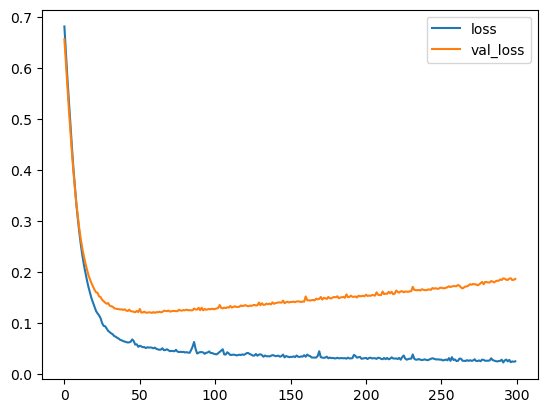

In [151]:
losses_of.plot()

plt.show()
# Perfect example of overfitted model

## 2-2/ ANN

##### Model

In [152]:
ann = Sequential()

ann.add(Dense(30, activation = 'relu'))
ann.add(Dense(15, activation = 'relu'))
ann.add(Dense(1, activation = 'sigmoid'))

ann.compile(loss = 'binary_crossentropy', optimizer = 'adam')

##### Early Stopping

In [153]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)
# Mode : if the metric was accuracy we want max, if its a loss, min

##### Model Test

In [154]:
ann.fit(X_ann_train, y_train, epochs = 600, validation_data = (X_ann_test, y_test),
         callbacks = [early_stop], verbose = 0) 

Epoch 97: early stopping


##### Losses

In [155]:
ann_loss = pd.DataFrame(ann.history.history)

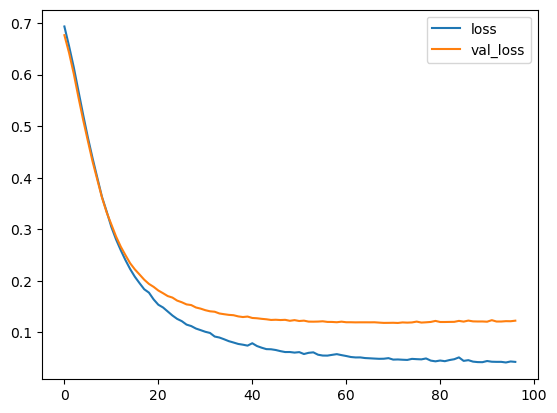

In [156]:
ann_loss.plot()
plt.show()

##### Add Dropout Layers

In [161]:
ann = Sequential()

ann.add(Dense(30, activation = 'relu'))
ann.add(Dropout(0.5))

ann.add(Dense(15, activation = 'relu'))
ann.add(Dropout(0.5))

ann.add(Dense(1, activation = 'sigmoid'))

ann.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [162]:
from tensorflow.keras.layers import Dropout

In [163]:
ann.fit(X_ann_train, y_train, epochs = 600, validation_data = (X_ann_test, y_test),
         callbacks = [early_stop], verbose = 0) 

Epoch 116: early stopping


##### Losses

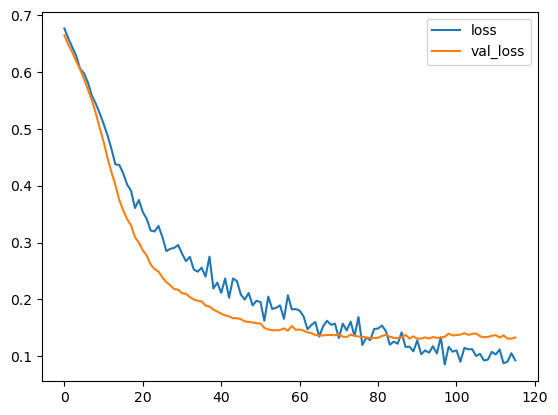

In [164]:
ann_loss = pd.DataFrame(ann.history.history)
ann_loss.plot()
plt.show()

##### Prediction

In [165]:
predictions = (ann.predict(X_ann_test) > 0.5).astype("int32")

6/6 [==============================] - 0s 801us/step


##### Evaluation

In [166]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        66
           1       0.97      1.00      0.99       105

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[ 63   3]
 [  0 105]]


## 3/ Logistic Regression

##### PCA

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_train)

PCA(n_components=2)

In [107]:
x_pca = pca.transform(X_train)

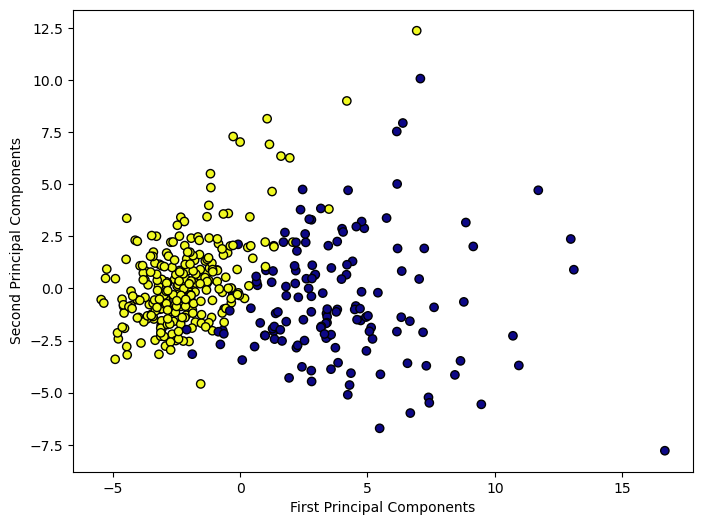

In [108]:
plt.figure(figsize = (8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = y_train, cmap = 'plasma', edgecolors = 'black')

plt.xlabel('First Principal Components')
plt.ylabel('Second Principal Components')
plt.show()
# We can see a very clear separation with just by 2 components(columns) (vs. 30 columns)

In [109]:
pca.components_        # Each row represents a principal component, each column relates back to the original features

array([[ 0.21789732,  0.09568852,  0.22639571,  0.2206608 ,  0.14296404,
         0.23762121,  0.25616697,  0.2602006 ,  0.13964867,  0.05621907,
         0.2130916 ,  0.01468972,  0.22007492,  0.20793405,  0.01472886,
         0.17058608,  0.14942628,  0.19337706,  0.04713718,  0.09455154,
         0.22585627,  0.0989893 ,  0.23484773,  0.22229359,  0.12986036,
         0.20950161,  0.22787031,  0.25223306,  0.12816189,  0.12218201],
       [-0.22771   , -0.05698301, -0.20998922, -0.22501625,  0.17201979,
         0.14630557,  0.06583371, -0.0387644 ,  0.19422954,  0.35846332,
        -0.10342819,  0.09700988, -0.08726275, -0.15097152,  0.21809084,
         0.2357454 ,  0.2037242 ,  0.12895115,  0.19396693,  0.28878038,
        -0.2190466 , -0.04130047, -0.19982979, -0.218982  ,  0.16513204,
         0.14126626,  0.1028722 , -0.0138594 ,  0.15051143,  0.27584364]])

In [110]:
df_comp = pd.DataFrame(pca.components_, columns = cancer['feature_names'])

In [111]:
df_comp     # 0 : first principal component, 1 : second principal component

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.217897,0.095689,0.226396,0.220661,0.142964,0.237621,0.256167,0.260201,0.139649,0.056219,...,0.225856,0.098989,0.234848,0.222294,0.129860,0.209502,0.227870,0.252233,0.128162,0.122182
1,-0.227710,-0.056983,-0.209989,-0.225016,0.172020,0.146306,0.065834,-0.038764,0.194230,0.358463,...,-0.219047,-0.041300,-0.199830,-0.218982,0.165132,0.141266,0.102872,-0.013859,0.150511,0.275844


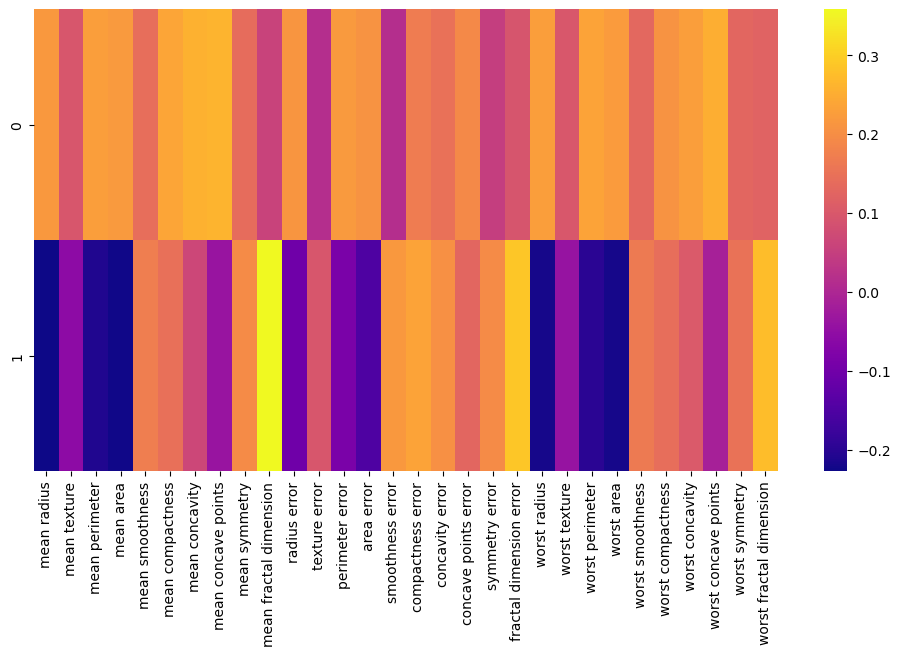

In [112]:
plt.figure(figsize = (12, 6))
sns.heatmap(df_comp, cmap = 'plasma')
plt.show()

In [99]:
# Each principal component is shown here as a row,
# the higher the number(hotter color) it's more correlated to a specific feature in the columns

##### Set Split

In [100]:
X_lr = x_pca
y_lr = y_train

In [101]:
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size = 0.2, random_state = 0)

##### Model

In [102]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_lr_train, y_lr_train)

LogisticRegression(random_state=0)

##### Prediction

In [103]:
lr_pred = lr.predict(X_lr_test)

##### Evaluation

In [104]:
cm = confusion_matrix(y_lr_test, lr_pred)
print(cm)
accuracy_score(y_lr_test, lr_pred)

[[23  3]
 [ 4 50]]


0.9125

##### k-Fold Cross Validation

In [105]:
accuracies = cross_val_score(estimator = lr, X = X_lr_train, y = y_lr_train, cv = 10)

print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 95.59 %
Standard Deviation : 3.49 %


##### Visualisation

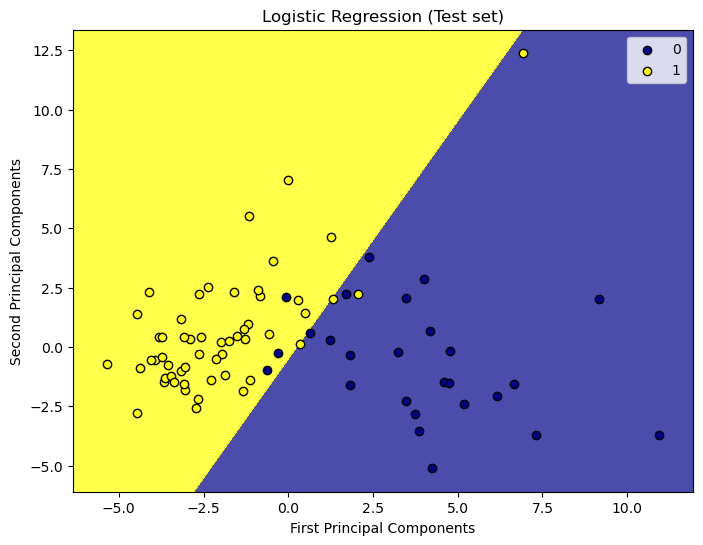

In [106]:
# Scatter plot is correct values and the regression line & colormap is the prediction
from matplotlib.colors import ListedColormap

plt.figure(figsize = (8, 6))
X_set, y_set = X_lr_test, y_lr_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.0025),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.0025))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.7, cmap = ListedColormap(('darkblue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)) :
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('darkblue', 'yellow'))(i), label = j, edgecolors = 'black')

plt.title('Logistic Regression (Test set)')
plt.xlabel('First Principal Components')
plt.ylabel('Second Principal Components')
plt.legend()
plt.show()

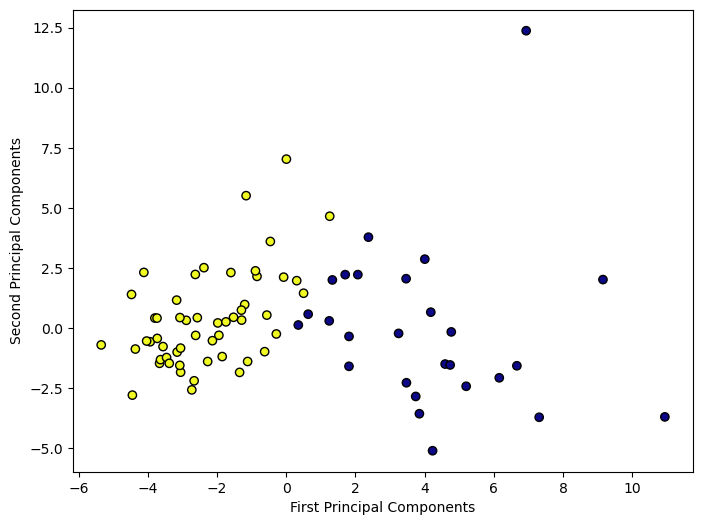

In [107]:
# Test set prediction
plt.figure(figsize = (8, 6))
plt.scatter(X_lr_test[:, 0], X_lr_test[:, 1], c = lr.predict(X_lr_test), cmap = 'plasma', edgecolors = 'black')

plt.xlabel('First Principal Components')
plt.ylabel('Second Principal Components')
plt.show()

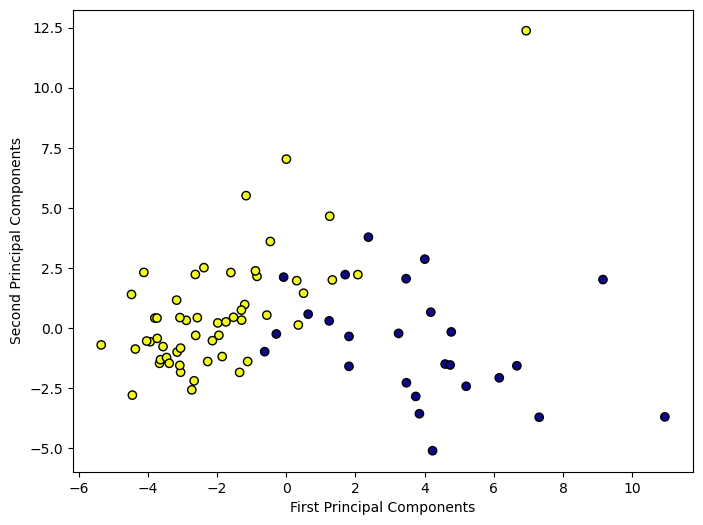

In [108]:
# Correct values
plt.figure(figsize = (8, 6))
plt.scatter(X_lr_test[:, 0], X_lr_test[:, 1], c = y_lr_test, cmap = 'plasma', edgecolors = 'black')

plt.xlabel('First Principal Components')
plt.ylabel('Second Principal Components')
plt.show()

## 4/  K Nearest Neighbors

##### Model

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

##### Prediction

In [114]:
knn_pred = knn.predict(X_test)

##### Evaluation

In [115]:
cm = confusion_matrix(y_test, knn_pred)
print(cm)
accuracy_score(y_test, knn_pred)

[[ 59   7]
 [  1 104]]


0.9532163742690059

##### k-Fold Cross Validation

In [116]:
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)

print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 96.73 %
Standard Deviation : 3.39 %


## 5/ Support Vector Machine

##### Model

In [113]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

##### Prediction

In [114]:
svm_pred = svm.predict(X_test)

##### Evaluation

In [115]:
cm = confusion_matrix(y_test, svm_pred)
print(cm)
accuracy_score(y_test, svm_pred)

[[ 64   2]
 [  2 103]]


0.9766081871345029

##### k-Fold Cross Validation

In [116]:
accuracies = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10)

print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 97.74 %
Standard Deviation : 1.75 %


##### Grid Search Model

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(estimator = SVC(), param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [119]:
grid.best_params_

{'C': 10, 'gamma': 0.001}

In [120]:
grid.best_estimator_

SVC(C=10, gamma=0.001)

In [121]:
grid.best_score_

0.9799050632911392

##### Prediction

In [122]:
grid_pred = grid.predict(X_test)

##### Evaluation

In [123]:
cm = confusion_matrix(y_test, grid_pred)
print(cm)
accuracy_score(y_test, grid_pred)

[[ 60   6]
 [  0 105]]


0.9649122807017544

##### k-Fold Cross Validation

In [124]:
accuracies = cross_val_score(estimator = grid.best_estimator_, X = X_train, y = y_train, cv = 10)

print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 98.24 %
Standard Deviation : 1.60 %


## 6/ Kernel SVM

##### Model

In [125]:
from sklearn.svm import SVC
ksvm = SVC(kernel = 'rbf', random_state = 0)
ksvm.fit(X_train, y_train)

SVC(random_state=0)

##### Prediction

In [126]:
ksvm_pred = ksvm.predict(X_test)

##### Evaluation

In [127]:
cm = confusion_matrix(y_test, ksvm_pred)
print(cm)
accuracy_score(y_test, ksvm_pred)

[[ 64   2]
 [  1 104]]


0.9824561403508771

##### k-Fold Cross Validation

In [128]:
accuracies = cross_val_score(estimator = ksvm, X = X_train, y = y_train, cv = 10)

print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 97.49 %
Standard Deviation : 1.58 %


## 7/ Decision Tree Classification

##### Model

In [129]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

##### Prediction

In [130]:
dtc_pred = dtc.predict(X_test)

##### Evaluation

In [131]:
cm = confusion_matrix(y_test, dtc_pred)
print(cm)
accuracy_score(y_test, dtc_pred)

[[63  3]
 [ 7 98]]


0.9415204678362573

##### k-Fold Cross Validation

In [132]:
accuracies = cross_val_score(estimator = dtc, X = X_train, y = y_train, cv = 10)

print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 92.71 %
Standard Deviation : 4.74 %


## 8/ Random Forest

##### Model

In [133]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

##### Prediction

In [134]:
rfc_pred = rfc.predict(X_test)

##### Evaluation

In [135]:
cm = confusion_matrix(y_test, rfc_pred)
print(cm)
accuracy_score(y_test, rfc_pred)

[[ 60   6]
 [  3 102]]


0.9473684210526315

##### k-Fold Cross Validation

In [136]:
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)

print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 96.49 %
Standard Deviation : 3.00 %


## 9/ Naive Bayes

##### Model

In [137]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

##### Prediction

In [138]:
nb_pred = nb.predict(X_test)

##### Evaluation

In [139]:
cm = confusion_matrix(y_test, nb_pred)
print(cm)
accuracy_score(y_test, nb_pred)

[[58  8]
 [ 6 99]]


0.9181286549707602

##### k-Fold Cross Validation

In [140]:
accuracies = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 10)

print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 94.99 %
Standard Deviation : 3.54 %
